#### Import modules/packages

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#### Make output directory

In [5]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

#### Load data and assign response (y) and predictor (X) variables. 

In [6]:
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = np.array(y)

X = [[1.191072215], [-0.150732988], [1.02539397], [0.192915327], [0.237137539], [0.533956707], [-0.228751412], [0.524620627], 
     [1.081934102], [0.875224248], [1.387946695], [0.682203195], [0.650375449], [1.146245458], [0.371088942], [1.396910481], 
     [0.319208586], [0.61971852], [0.654233226], [0.562634732], [0.114221031], [0.481049931], [-0.428311114], [1.255137404], 
     [1.041066024], [0.969473169], [-0.731967289], [0.802590184], [0.550082823], [-1.272879776], [0.427473371], [-0.451440377], 
     [1.455265987], [0.906650123], [1.186416787], [1.468974794], [0.956555924], [-0.05405806], [1.015775188], [1.052885522], 
     [0.483556833], [0.589072028], [-0.029023829], [0.239449596], [-1.288667521], [-1.863513657], [0.588107367], [-1.285098534],
     [-2.19697431], [-1.946418018], [-1.853475609], [-0.654115876], [0.725006684], [-1.457779057], 
     [-1.53202234], [-1.560086252], [0.901247496], [-1.95333853], [0.419436844], [0.594437252], [-0.10963962], [-1.435731885], 
     [-0.217053693], [-2.446162331], [-0.26829819], [0.494217693], [0.198844212], [0.219697953], [0.343805283], [-1.236012131], 
     [-0.794290172], [0.968658121], [-0.624976831], [0.401511012], [-0.321885188], [-1.102287759], [-0.266741162], [0.925130918], 
     [0.246887668], [0.487255428], [-1.108491516], [-1.066809261], [-1.564944354], [-0.705496938], [-1.287848124], 
     [-1.057692382], [-0.803777606], [1.394033023]]

X = np.array(X)
print(X.shape)

(88, 1)


#### Fit model and calculate ROC metrics

In [7]:
model = LogisticRegression().fit(X, y)
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(X)[:,1])
roc_auc = metrics.roc_auc_score(y, model.predict_proba(X)[:,1])

print("Accuracy:", metrics.accuracy_score(y, model.predict(X)))
print("AUC:", roc_auc)
print("Confusion matrix:")
print(metrics.confusion_matrix(y, model.predict(X)))
print("Classification report:")
print(metrics.classification_report(y, model.predict(X)))
print()

Accuracy: 0.7386363636363636
AUC: 0.8243801652892563
Confusion matrix:
[[36  8]
 [15 29]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        44
           1       0.78      0.66      0.72        44

    accuracy                           0.74        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.74      0.74      0.74        88




#### Time to visualize the results generated above

<Figure size 432x288 with 0 Axes>

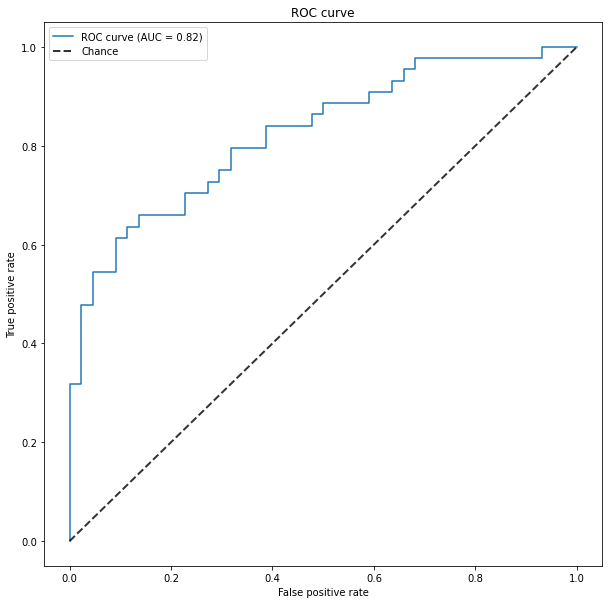

In [8]:
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label = "ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="black", label="Chance", alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='best')
plt.savefig('output\TrueROC.png', dpi=100)
plt.show()

### ROC with k-fold cross validation

#### Calculate ROC folds

In [9]:
k = 5 #change as necessary
groups = np.array([])
for i in range(len(y)):
    groups = np.append(groups, i)
kfold = StratifiedKFold(n_splits=k)
kfold.get_n_splits(X, y, groups)

5

In [10]:
fprdict = list()
tprdict = list()
roc_aucdict = list()
acc_score = []

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression().fit(X_train, y_train)
    fpr, tpr, _ = metrics.roc_curve(y_train, model.predict_proba(X_train)[:,1])
    roc_auc = metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

    fprdict.append(fpr)
    tprdict.append(tpr)
    roc_aucdict.append(roc_auc)
    
    print('Fold', (i+1))
    print("Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
    print("AUC:", roc_auc)
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y_train, model.predict(X_train)))
    print("Classification report:")
    print(metrics.classification_report(y_train, model.predict(X_train)))
    print()

Fold 1
Accuracy: 0.7142857142857143
AUC: 0.8163265306122449
Confusion matrix:
[[28  7]
 [13 22]]
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.76      0.63      0.69        35

    accuracy                           0.71        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.72      0.71      0.71        70


Fold 2
Accuracy: 0.7142857142857143
AUC: 0.8073469387755102
Confusion matrix:
[[27  8]
 [12 23]]
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        35
           1       0.74      0.66      0.70        35

    accuracy                           0.71        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.72      0.71      0.71        70


Fold 3
Accuracy: 0.7571428571428571
AUC: 0.8253061224489796
Confusion matrix:
[[29  6]
 [11 24]]
Classif

#### Calculate the ROC mean

In [11]:
longest = len(max(tprdict,key=len))
n = 0

for i in tprdict:
    if len(i) < longest:
        temparray = list(i)
        end = (longest - len(i)) / 2
        for j in range(int(end)):
            temparray.insert(0, 0)
            temparray.insert(-1, 1)
        tprdict[n] = temparray
    n = n + 1

n = 0
for i in fprdict:
    if len(i) < longest:
        temparray = list(i)
        end = (longest - len(i)) / 2
        for j in range(int(end)):
            temparray.insert(0, 0)
            temparray.insert(-1, 1)
        fprdict[n] = temparray
    n = n + 1
    
mean_tpr = np.mean(tprdict, axis=0)
mean_tpr[-1] = 1.0
mean_fpr = np.mean(fprdict, axis=0)
mean_fpr[-1] = 1.0
mean_auc = np.mean(roc_aucdict, axis=0)
std_auc = np.std(roc_aucdict)

#### Calculate the ROC standard deviation

In [12]:
std_tpr = np.std(tprdict, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#### Time to visualize the results generated above

<Figure size 432x288 with 0 Axes>

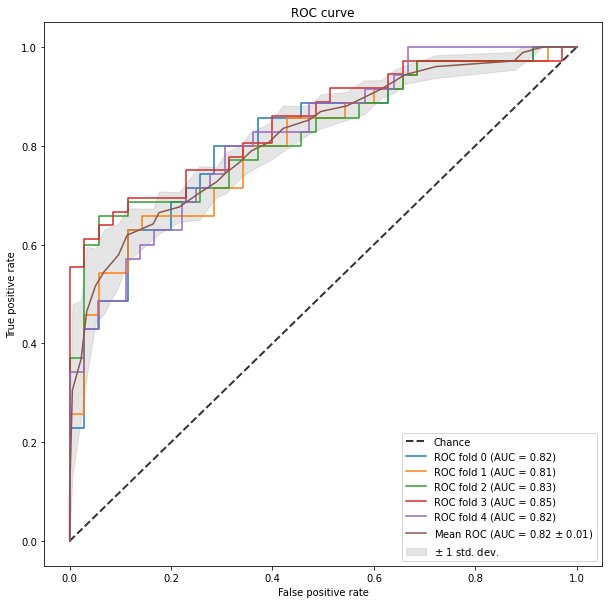

In [13]:
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle="--", color="black", lw=2, alpha=0.8, label="Chance")

for i in range(k):
    plt.plot(fprdict[i], tprdict[i], label = (("ROC fold {}".format(i)) + " (AUC = %0.2f)" % roc_aucdict[i]))

plt.plot(mean_fpr, mean_tpr, label = ("Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc)))
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='best')
plt.savefig('output\KmeansROC.png', dpi=100)
plt.show()